In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
dataframe= pd.read_csv("Zomato analysis data.csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [7]:
def cleanrate(value):
    value= str(value).split('/')
    value= value[0];
    return float (value)
dataframe['rate']= dataframe['rate'].apply(cleanrate)
print(dataframe.head())


dataframe.info()

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148

In [10]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'COUNT VALUE')

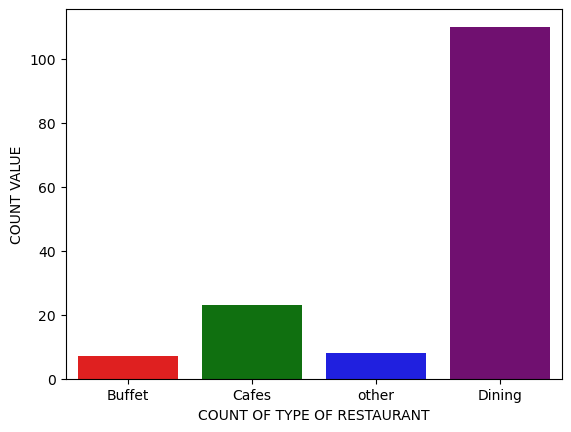

In [21]:
sns.countplot(x=dataframe['listed_in(type)'], hue=dataframe['listed_in(type)'], palette=['red', 'green', 'blue', 'purple'])
plt.xlabel("COUNT OF TYPE OF RESTAURANT")
plt.ylabel("COUNT VALUE")



Text(0, 0.5, 'Votes')

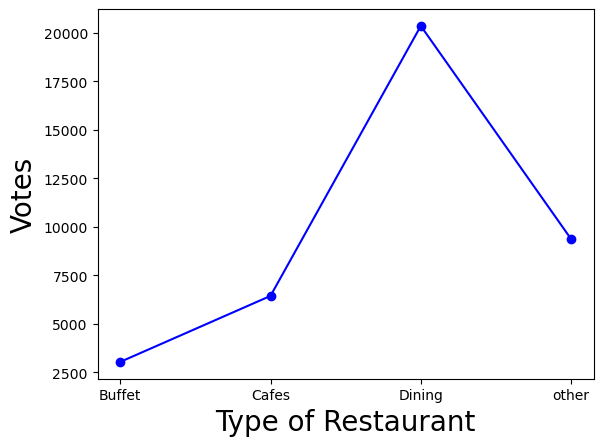

In [29]:
#    Which type of restaurant has max number of votes

grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes': grouped_data})
plt.plot(result , c="blue", marker="o")
plt.xlabel("Type of Restaurant", c="black" , size=20)
plt.ylabel("Votes", c="black" , size=20)
#variable grouped data  in which listed in type of restaurant votes sum is done
#passed grouped data in the votes column
#marker= dots



#THE DINING TYPE RESTAURANT HAS RECIVED MAX VOTES


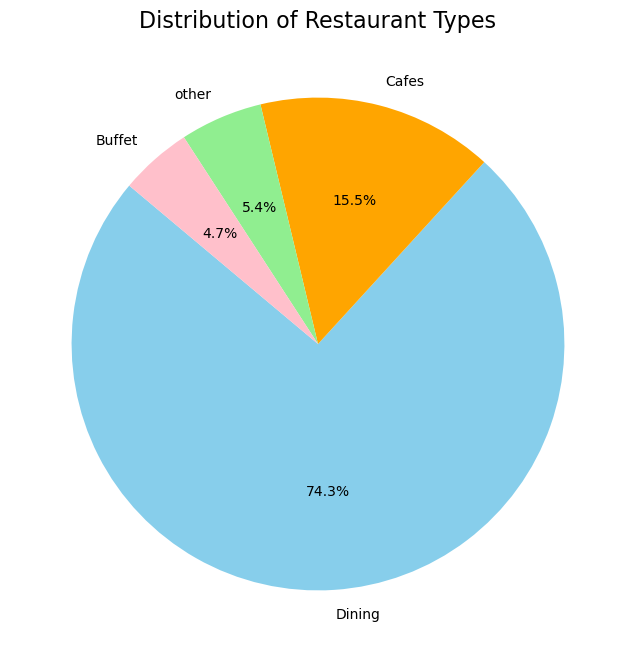

In [32]:
# DISTRIBUTION OF  RESTAURANT TYPE:


type_counts = dataframe['listed_in(type)'].value_counts()  # Count of each type

plt.figure(figsize=(8, 8))  # Adjust the figure size
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen', 'pink'])
plt.title("Distribution of Restaurant Types", fontsize=16)
plt.show()


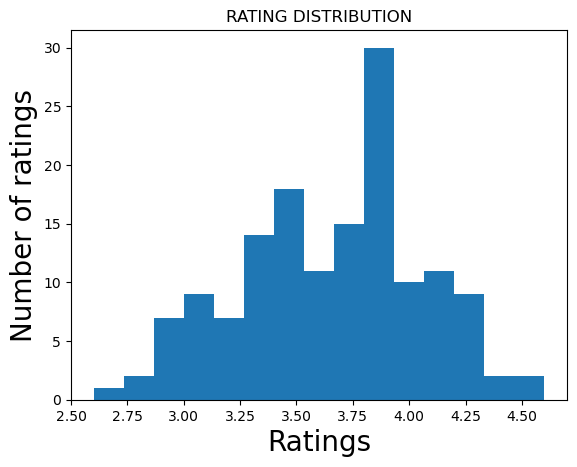

In [38]:
#RATING DISTRIBUTION WITH ALL THE RATINGS WITH HISTORGAM


plt.hist(dataframe['rate'], bins=15)
plt.title("RATING DISTRIBUTION")
plt.ylabel("Number of ratings", c="black" , size=20)
plt.xlabel("Ratings", c="black" , size=20)
plt.show()

# 40 to 50  rating is  betweeen  3.50 to 4.00

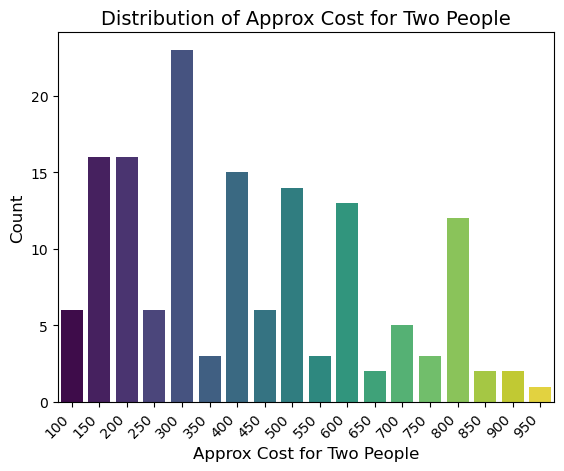

In [51]:
#average spending on each order by couples

couple_avg_cost= dataframe['approx_cost(for two people)']

sns.countplot(x=couple_avg_cost, hue=couple_avg_cost, palette='viridis', legend=False)
plt.xlabel("Approx Cost for Two People", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Approx Cost for Two People", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#   conclusion :    here we can see that the majority number of couples prefre restaurants with approx cost  Rs.300  then  
# and the 2nd position is between  Rs.150  to Rs 200 and so on.. and now we can do a personalizatio
# such that the customers are provided list of items in range of cost between 300 to 500 
# the least one is rs.950

<Axes: xlabel='online_order', ylabel='rate'>

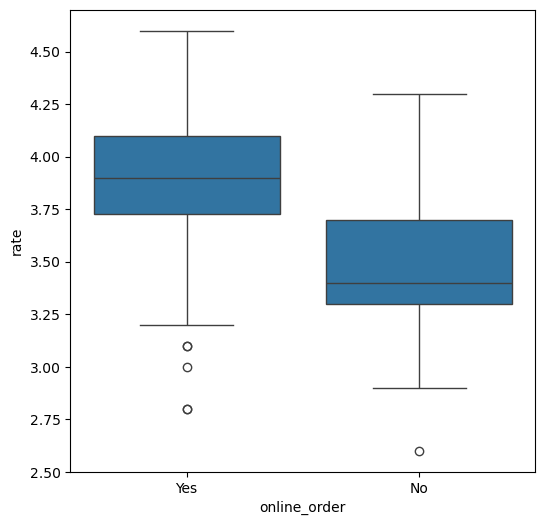

In [52]:
#which mode recieves the most rating 


plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y= 'rate' , data= dataframe)

In [ ]:
# offline order s recieve lower rating in comparison to online orders

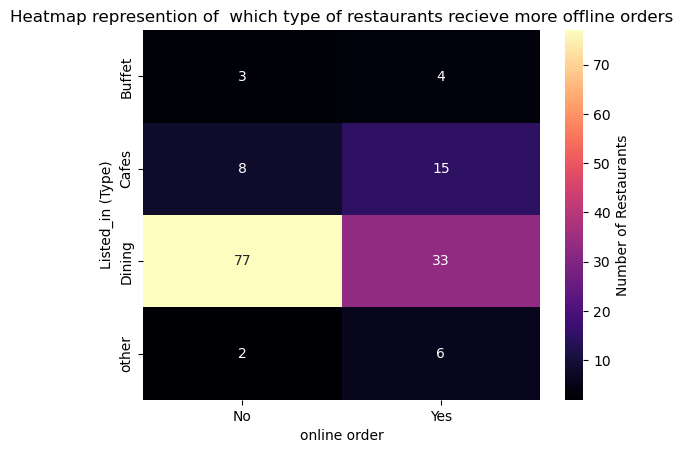

In [57]:
#  which type of restaurants recive more offline orders


pivot_table = dataframe.pivot_table(index= 'listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table , annot=True , cmap = "magma" , fmt='d', cbar_kws={'label': 'Number of Restaurants'})
plt.title("Heatmap represention of  which type of restaurants recieve more offline orders")
plt.xlabel("online order")
plt.ylabel("Listed_in (Type)")
plt.show()

In [ ]:
# from this we can conclude that for dining type restaurant the max number of cutoemr have orderer
#offline ie 77% have ordeered online and 33 % have ordered online

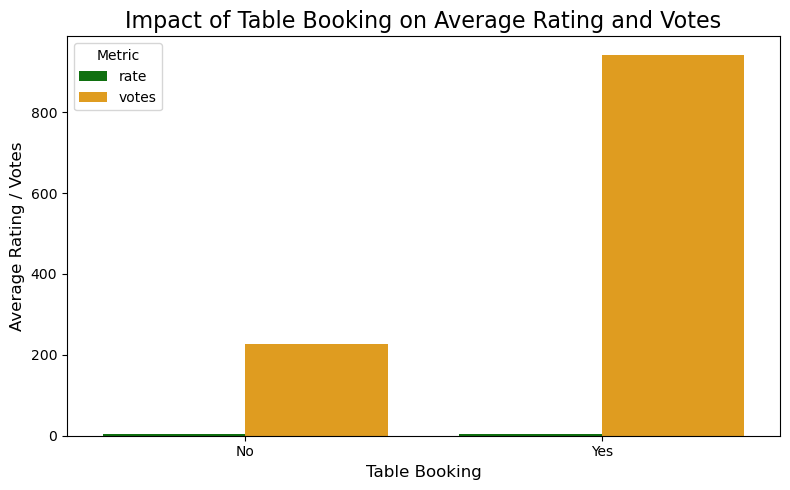

In [71]:
## Are restaurants that allow table booking rated higher?

# the impact of table booking on the ratings and votes of restaurants,
# specifically comparing those that allow table booking (table_booking == "Yes") 
# vs. those that don't (table_booking == "No").


#step1  grouping data by yes and no in table booking to comapre how much is the 
#rating avg and votes avg for both criteria



# Grouping data by table booking status and calculating the mean for rating and votes
table_booking = dataframe.groupby('book_table')[['rate', 'votes']].mean()
table_booking = table_booking.reset_index()

table_booking_melted = table_booking.melt(id_vars=['book_table'], value_vars=['rate', 'votes'],
                                         var_name='Metric', value_name='Value')

plt.figure(figsize=(8, 5))
sns.barplot(x='book_table', y='Value', hue='Metric', data=table_booking_melted, palette=['green', 'orange'])
plt.title("Impact of Table Booking on Average Rating and Votes", fontsize=16)
plt.xlabel("Table Booking", fontsize=12)
plt.ylabel("Average Rating / Votes", fontsize=12)
plt.legend(title='Metric')
plt.show()




In [ ]:
#               The large disparity between the ratings and votes for "Yes" and "No" suggests 
#that restaurants allowing table bookings might cater to a more demanding or loyal
#customer base, thus receiving better ratings.